<a href="https://colab.research.google.com/github/harnalashok/DataVisualization/blob/master/structure_in_data_lower_back_pain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Last amended: 16th July, 2022
# Data source: Kaggle: https://www.kaggle.com/datasets/sammy123/lower-back-pain-symptoms-dataset
#
# Refer: https://github.com/harnalashok/DataVisualization/blob/master/structure_in_data_ad_data.ipynb

#
# objectives:
#           Discover relationships and existence of pattern
#           in data using lower back pain data
#            Looking at structure in data
#                       a. Parallel coordinates plots
#                       b. Radviz plots
#                       c. Andrews curves
#                       d. t-sne plots


## Call libraries

In [99]:

# 1.0 Call libraries
%reset -f
# 1.1 For data manipulations
import numpy as np
import pandas as pd
from numpy.random import default_rng

# 1.2 For plotting
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl     # For creating colormaps

# 1.3 For data processing
from sklearn.preprocessing import StandardScaler

# 1.4 OS related
import os

# 1.5 for working in ipython
#%matplotlib qt5
#%matplotlib inline


In [100]:
#1.6 From a cell display outputs from multiple commands:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [101]:
# 1.6.1 For generating random numbers:
rng = default_rng()

In [102]:
# 1.7 Mount google drive:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [103]:
# 1.8 Go to folder containing data file
path = "/content/sample_data"


In [104]:
# 1.8.1 Change working directory
os.chdir(path)

# 1.8.2 list files
os.listdir()            # List all files in the folder


['anscombe.json',
 'README.md',
 'dataset_spine_modified.csv',
 'california_housing_test.csv',
 'mnist_train_small.csv',
 'mnist_test.csv',
 'california_housing_train.csv']

## Read data

In [105]:
# 2.0 Read porto data and 
#     take a sample 
spine = pd.read_csv("dataset_spine_modified.csv")
spine.shape   # (595212, 59)

(310, 13)

In [106]:
# 2.1 Have a look at the data
spine.head()
print("\n-----\n")
spine.dtypes
print("\n------\n")
spine.dtypes.value_counts()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,1



-----



Col1         float64
Col2         float64
Col3         float64
Col4         float64
Col5         float64
Col6         float64
Col7         float64
Col8         float64
Col9         float64
Col10        float64
Col11        float64
Col12        float64
Class_att      int64
dtype: object


------



float64    12
int64       1
dtype: int64

## Some pre-processing

In [107]:
# 3.1
cols = spine.columns

In [108]:
# 3.2 Create an instance of StandardScaler object
ss= StandardScaler()

In [109]:
# 3.3 Use fit and transform method
nc = ss.fit_transform(spine)

In [90]:
# 3.4
nc.shape     # (310, 13)


(310, 13)

In [110]:
# 3.5 Transform numpy array back to pandas dataframe
#        as we will be using pandas plotting functions
nc = pd.DataFrame(nc, columns = cols)
nc.head(2)

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att
0,0.147086,0.501369,-0.665177,-0.184950,-1.447647,-0.708059,0.951630,-1.015066,0.434293,1.167129,-1.196587,1.712368,0.690066
1,-1.245864,-0.748769,-1.453001,-1.041521,-0.264385,-0.579556,-0.202553,-0.977816,1.316291,1.679551,-0.940325,-0.913941,0.690066


In [111]:
# 3.6 Add/overwrite few columns that are discrete
#        These columns were not to be scaled

nc['Class_att'] = spine['Class_att']

nc.shape    # (1000,11)

(310, 13)

## Parallel coordinates plot

In [ ]:
# 5.0   Now start plotting
#        https://pandas.pydata.org/docs/reference/api/pandas.plotting.parallel_coordinates.html



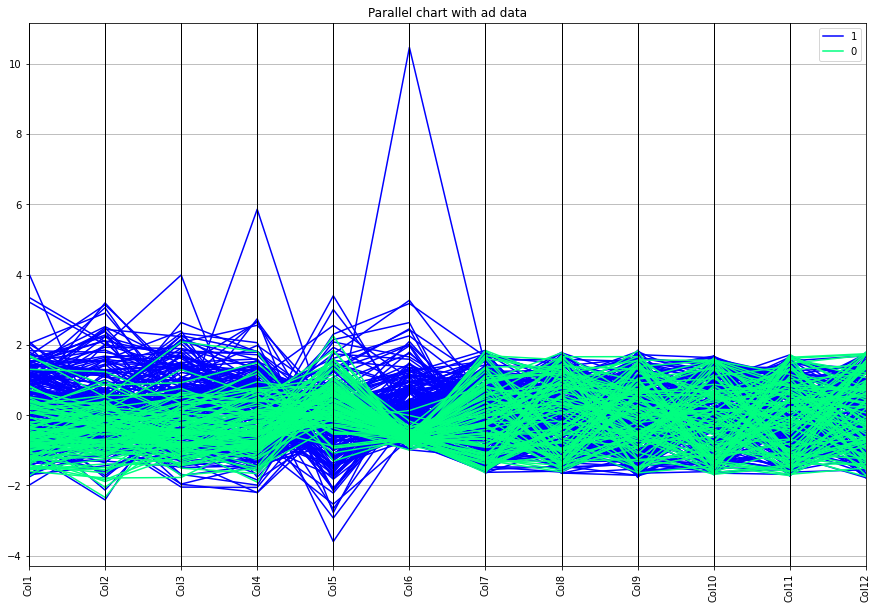

In [115]:
# 5.1 Parallel coordinates with 'ad' data
fig2 = plt.figure(figsize = (15,10))
ax = pd.plotting.parallel_coordinates(nc,
                                      'Class_att',
                                      colormap= plt.cm.winter
                                      ) ;

plt.xticks(rotation=90) ;
plt.title("Parallel chart with spine data") ;



## Andrews plot

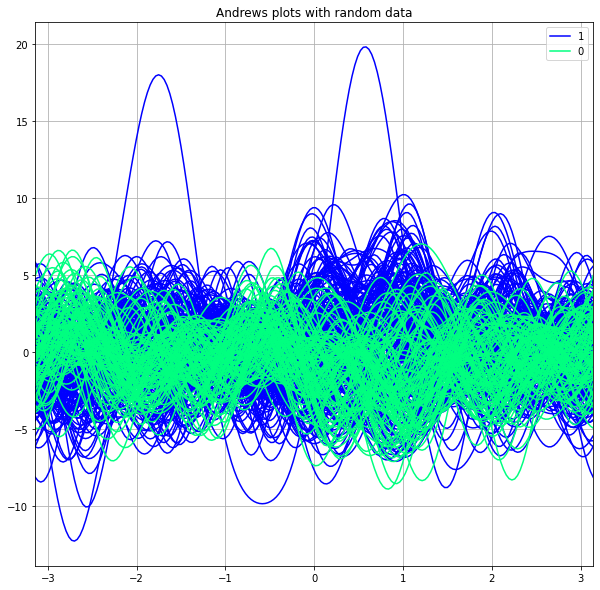

In [117]:
# 6.0 Andrews charts with random data
fig3 = plt.figure(figsize = (10,10))
pd.plotting.andrews_curves(nc,
                           'Class_att',
                           colormap = 'winter') ;

plt.title("Andrews plots") ;

## Radviz plot

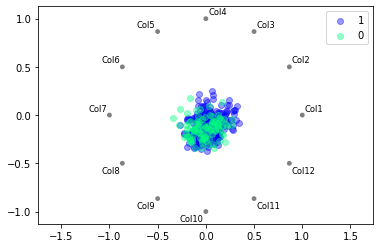

In [118]:
# 7.0 Radviz plot
# https://pandas.pydata.org/docs/reference/api/pandas.plotting.radviz.html

fig5 = plt.figure()
pd.plotting.radviz(nc,
                   class_column ='Class_att',
                   colormap= plt.cm.winter,
                   alpha = 0.4
                   ) ;



## t-sne

In [120]:
# 8.0 See the power of t-sne
#      (t-distributed Stochastic Neighbor Embedding)

from sklearn.manifold import TSNE


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


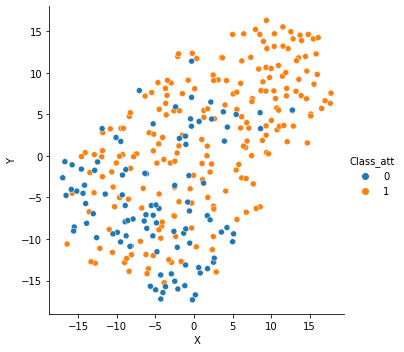

In [122]:
# 8.1 Project all data but 'Class_att' on two axis

X_embedded = TSNE(n_components=2).fit_transform(nc.iloc[:,:-1])
X_embedded.shape    #  numpy array
df = pd.DataFrame(X_embedded, columns=['X','Y'])

# 11.5.2 No two plots will be the same
sns.relplot(x = "X",
            y = "Y",
            hue = nc.Class_att,    # Colur each point as per 1 or 0
            data = df
            ) ;


In [ ]:
############## I am done ###############3